In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize
from google.colab import files

from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
measured_voltage = np.array([474,475.5,480,492,504,518,532,543,558,569,583,596,608,624.5,638,653,668,684,695,695,695])
count_rate = np.array([0,0,0.12,0.14,0.15,0.16,0.16,0.16,0.175,0.175,0.18,0.19,0.2,0.23,0.25,0.275,0.29,0.29,0.31,0.32,0.33])
e_count_rate = np.array([0.001,0.001,0.013,0.02,0.02,0.02,0.025,0.02,0.02,0.02,0.025,0.025,0.02,0.025,0.03,0.03,0.03,0.05,0.05,0.05,0.025])
e_log_count_rate = count_rate**(-1)*e_count_rate

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in reciprocal
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:3324: RuntimeWarning: invalid value encountered in double_scalars
  high = [v + e for v, e in zip(data, b)]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

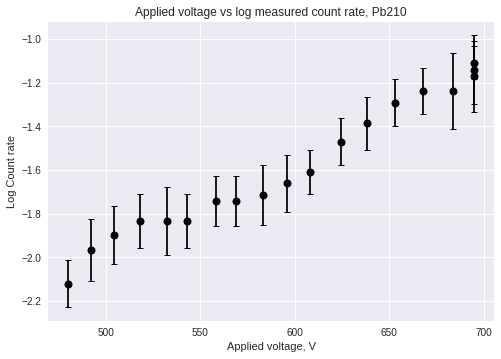

In [ ]:
plt.style.use('seaborn')
plt.rcParams.update({'lines.markeredgewidth': 1})
plt.errorbar(measured_voltage, np.log(count_rate), e_log_count_rate, fmt='o', capsize=3, color='black')
plt.title('Applied voltage vs log measured count rate, Pb210')
plt.xlabel('Applied voltage, V')
plt.ylabel('Log Count rate')
plt.savefig("a.png",dpi=400)
files.download('a.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


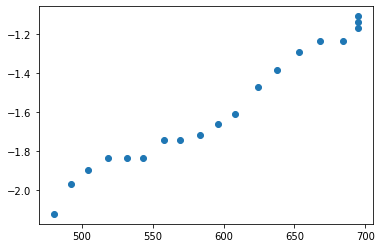

In [ ]:
plt.scatter(measured_voltage,np.log(count_rate))

In [ ]:
# https://docs.google.com/spreadsheets/d/1U12AJLkDTC0x-WsK32YrAJg1v6virGZJVvG06b0lTCo/edit?usp=sharing

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1U12AJLkDTC0x-WsK32YrAJg1v6virGZJVvG06b0lTCo/edit?usp=sharing')
sheet = wb.worksheet('6 241Am')
data = sheet.get_all_values()
df = pd.DataFrame(data)
# df.columns = df.iloc[0]
# df = df.iloc[1:]
values = np.array(df[0][1:])
values = values.astype(float)
values.sort()
print(np.mean(values))
print(np.std(values))

0.2131930693069307
0.012462909386709636


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

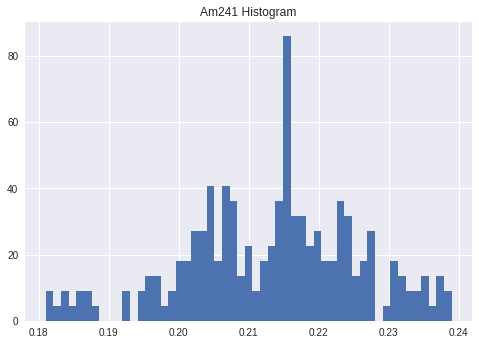

In [ ]:
a = plt.hist(values, len(np.unique(values)),density=True)
# a = plt.hist(values, len(np.unique(values)), density=0)
# plt.style.use('seaborn')
# plt.rcParams.update({'lines.markeredgewidth': 1})
# plt.errorbar(measured_voltage, np.log(count_rate), e_log_count_rate, fmt='o', capsize=3, color='black')
plt.title('Am241 Histogram')
# plt.xlabel('Applied voltage, V')
# plt.ylabel('Log Count rate')
plt.savefig("a.png",dpi=400)
files.download('a.png')

In [ ]:
a[1][31]

0.162

In [ ]:
np.std(values)
# error - sqrt of frequency on that bar OR look at the whole interval 


0.012829485326777534

In [ ]:
'''A = 0
for i in range(len(a[0])):
  dA = np.sum(a[0][i]) * a[1][0]
  A += dA'''

A = np.sum(a[0]) * (a[1][1]-a[1][0])



1.0000000000000044

In [ ]:
# https://docs.google.com/spreadsheets/d/1U12AJLkDTC0x-WsK32YrAJg1v6virGZJVvG06b0lTCo/edit?usp=sharing

stop = 90

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1U12AJLkDTC0x-WsK32YrAJg1v6virGZJVvG06b0lTCo/edit?usp=sharing')
sheet = wb.worksheet('exp 7')
data = sheet.get_all_values()
df = pd.DataFrame(data)
# df.columns = df.iloc[0]
# df = df.iloc[1:]
time = np.array(df[1][1:][:stop])
time = time.astype(float)

counts = np.array(df[2][1:][:stop])
counts = counts.astype(float)

In [ ]:
counts

array([   0.,   21.,   46.,   68.,   97.,  120.,  149.,  176.,  207.,
        235.,  263.,  288.,  307.,  337.,  356.,  390.,  418.,  451.,
        477.,  505.,  530.,  555.,  581.,  604.,  630.,  652.,  676.,
        699.,  720.,  746.,  784.,  817.,  847.,  882.,  910.,  933.,
        957.,  984., 1010., 1038., 1069., 1092., 1119., 1140., 1161.,
       1187., 1214., 1243., 1263., 1289.])

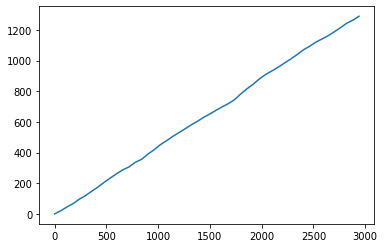

In [ ]:
plt.plot(time,counts)

R² = 0.9997543050391405
Half life is 967.0382516769009 minutes


1.1946221350913256e-05

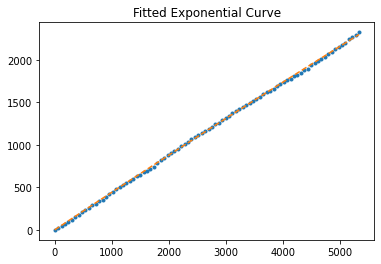

In [ ]:
def decay(time, N_0, decay_constant):
    return N_0 * (1 - np.exp(-decay_constant * time))

# perform the fit
p0 = (2000, 0.0002139343) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(decay, time, counts, p0)
N_0, decay_constant = params
# sampleRate = 20_000 # Hz
# tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(counts - decay(time, N_0, decay_constant))
squaredDiffsFromMean = np.square(counts - np.mean(counts))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(time, counts, '.', label="data")
plt.plot(time, decay(time, N_0, decay_constant), '--', label="fitted")
plt.title("Fitted Exponential Curve")
print('Half life is ' + str((np.log(2)/params[1])/60)+ ' minutes')
params[1]

# # inspect the parameters
# print(f"Y = {m} * e^(-{t} * x) + {b}")
# print(f"Tau = {tauSec * 1e6} µs")

R² = -2.967921492493873
Half life is 0.17966069675457857 minutes


0.06430150399067742

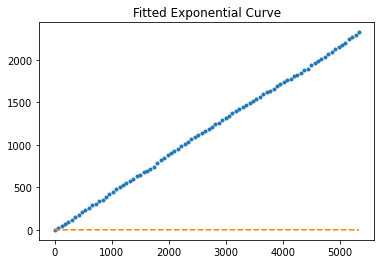

In [ ]:
def decay(time, decay_constant):
    return (1 - np.exp(-decay_constant * time))

# perform the fit
p0 = (0.0002139343) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(decay, time, counts, p0)
decay_constant = params
# sampleRate = 20_000 # Hz
# tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(counts - decay(time, decay_constant))
squaredDiffsFromMean = np.square(counts - np.mean(counts))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(time, counts, '.', label="data")
plt.plot(time, decay(time, decay_constant), '--', label="fitted")
plt.title("Fitted Exponential Curve")
print('Half life is ' + str(np.log(2)/params[0]/60)+ ' minutes')
params[0]

# # inspect the parameters
# print(f"Y = {m} * e^(-{t} * x) + {b}")
# print(f"Tau = {tauSec * 1e6} µs")

Half life is 713.7997915112061 minutes


9.78677447179476e-06